# GRAPH CONVOLUTIONAL NETWORKS

### INITIALIZING THE GRAPH

GRAPH INFO:
 Name: GCN
Type: Graph
Number of nodes: 6
Number of edges: 9
Average degree:   3.0000

GRAPH NODES:  [(0, {'name': 0}), (1, {'name': 1}), (2, {'name': 2}), (3, {'name': 3}), (4, {'name': 4}), (5, {'name': 5})]

GRAPH EDGES:  [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5)]


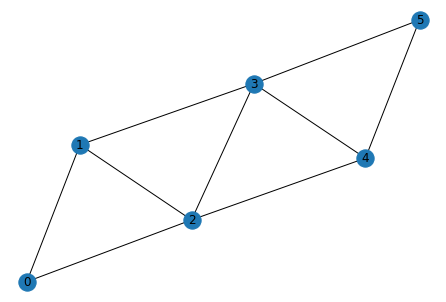

In [87]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power
import warnings

%matplotlib inline

warnings.filterwarnings("ignore", category=UserWarning)

# Initializing the Graph
G = nx.Graph(name = 'GCN')

# Creating nodes
for i in range(6):
    G.add_node(i, name = i)

# Creating edges
edges = [(0,1),(1,2),(2,3),(3,4),(4,5),(0,2),(1,3),(2,4),(3,5)]
G.add_edges_from(edges)

# Graph info
print("GRAPH INFO:\n", nx.info(G))
print("\nGRAPH NODES: ", G.nodes.data())
print("\nGRAPH EDGES: ", G.edges)

# Plotting the graph
nx.draw(G, with_labels = True)

### GETTING ADJACENCY MATRIX AND NODE FEATURES MATRIX AND CALCULATING THEIR DOT PRODUCT

In [88]:
# Getting the Adjacency matrix (A) and Node Features matrix (x)
A = np.array(nx.attr_matrix(G, node_attr='name')[0])
X = np.array(nx.attr_matrix(G, node_attr='name')[1])
X = np.expand_dims(X,axis=1)

print('Shape of A: ', A.shape)
print('Shape of X: ', X.shape)
print('\nAdjacency matrix (A):\n', A)
print('\nNode Features matrix (X):\n', X)

# Calculating the dot product of A and X
AX = np.dot(A,X)
print("\nDot product (A.X):\n", AX)

Shape of A:  (6, 6)
Shape of X:  (6, 1)

Adjacency matrix (A):
 [[0. 1. 1. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0.]
 [1. 1. 0. 1. 1. 0.]
 [0. 1. 1. 0. 1. 1.]
 [0. 0. 1. 1. 0. 1.]
 [0. 0. 0. 1. 1. 0.]]

Node Features matrix (X):
 [[0]
 [1]
 [2]
 [3]
 [4]
 [5]]

Dot product (A.X):
 [[ 3.]
 [ 5.]
 [ 8.]
 [12.]
 [10.]
 [ 7.]]


### NORMALIZING A

In [89]:
# Adding self-loops
G_self_loops = G.copy()

self_loops = []
for i in range(G.number_of_nodes()):
    self_loops.append((i,i))

G_self_loops.add_edges_from(self_loops)

# Checking the edges of G_self_loops after adding the self loops
print('Edges of G with self-loops:\n', G_self_loops.edges)

# Getting the Adjacency matrix (A) and Node Features matrix (X) of added self-lopps graph
A_hat = np.array(nx.attr_matrix(G_self_loops, node_attr='name')[0])
print('\nAdjacency matrix of added self-loops G (A_hat):\n', A_hat)

# Calculating the dot product of A_hat and X (AX)
AX = np.dot(A_hat, X)
print('\n Dot product (A_hat.X):\n', AX)

# Gettin the Degree matrix (D)
Deg_Mat = G_self_loops.degree()
print('\nDegree Matrix of added self-loops G (D): ', Deg_Mat)

# Converting D to a N x N matrix
D = np.diag([deg for (n,deg) in list(Deg_Mat)])
print('\nDegree Matrix of added self-loops G as numpy array (D):\n', D)

# Finding the inverse of D
D_inv = np.linalg.inv(D)
print('\nInverse of D:\n', D_inv)

# Calculating dot product of D_inv and A_hat.X for normalization
DAX = np.dot(D_inv,AX)
print('\nDot product (D_inv.A_hat.X:\n', DAX)

# Symmetric Normalization
D_halfinv = fractional_matrix_power(D, -0.5)
DADX = D_halfinv.dot(A_hat).dot(D_halfinv).dot(X)
print('\nDot product (D_halfinv.A_hat.D_halfinv.X):\n', DADX)

Edges of G with self-loops:
 [(0, 1), (0, 2), (0, 0), (1, 2), (1, 3), (1, 1), (2, 3), (2, 4), (2, 2), (3, 4), (3, 5), (3, 3), (4, 5), (4, 4), (5, 5)]

Adjacency matrix of added self-loops G (A_hat):
 [[1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]]

 Dot product (A_hat.X):
 [[ 3.]
 [ 6.]
 [10.]
 [15.]
 [14.]
 [12.]]

Degree Matrix of added self-loops G (D):  [(0, 4), (1, 5), (2, 6), (3, 6), (4, 5), (5, 4)]

Degree Matrix of added self-loops G as numpy array (D):
 [[4 0 0 0 0 0]
 [0 5 0 0 0 0]
 [0 0 6 0 0 0]
 [0 0 0 6 0 0]
 [0 0 0 0 5 0]
 [0 0 0 0 0 4]]

Inverse of D:
 [[0.25       0.         0.         0.         0.         0.        ]
 [0.         0.2        0.         0.         0.         0.        ]
 [0.         0.         0.16666667 0.         0.         0.        ]
 [0.         0.         0.         0.16666667 0.         0.        ]
 [0.         0.         0.         0.         0.2        0.        ]
 [

### BUILDING GCN LAYER

In [90]:
# Initializing the weights
np.random.seed(77777)
n_h = 4 # number of neurons in the hidden layer
n_y = 2 # number of neurons in the output layer
W0 = np.random.randn(X.shape[1],n_h) * 0.01
W1 = np.random.randn(n_h,n_y) * 0.01

# Implementing ReLu as activation function
def relu(x):
    return np.maximum(0,x)

# Building GCN layer
def gcn(A,H,W):
    I = np.identity(A.shape[0]) # creating Identity matrix of A
    A_hat = A + I #add self-loop to A
    D = np.diag(np.sum(A_hat, axis=0)) # creating Degree matrix of A
    D_halfinv = fractional_matrix_power(D, -0.5) # calculating D to the power of -0.5
    eq = D_halfinv.dot(A_hat).dot(D_halfinv).dot(H).dot(W)
    return relu(eq)


# Doing forward propagation
H1 = gcn(A,X,W0)
H2 = gcn(A,H1,W1)
print('Features Representation from GCN output:\n', H2)

Features Representation from GCN output:
 [[0.00018473 0.        ]
 [0.00027634 0.        ]
 [0.00036873 0.        ]
 [0.00047873 0.        ]
 [0.00048303 0.        ]
 [0.00047428 0.        ]]


### PLOTTING THE FEATURES REPRESENTATIONS

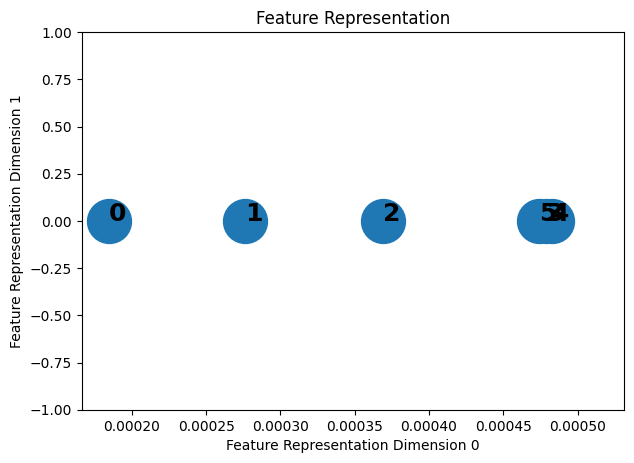

In [91]:
def plot_features(H2):
    # Plotting the features representation
    x = H2[:,0]
    y = H2[:,1]

    size = 1000

    plt.figure(figsize=(7,5),dpi = 100)
    plt.scatter(x,y,size)
    plt.xlim([np.min(x)*0.9, np.max(x)*1.1])
    plt.ylim([-1, 1])
    plt.xlabel('Feature Representation Dimension 0')
    plt.ylabel('Feature Representation Dimension 1')
    plt.title('Feature Representation')

    for i,row in enumerate(H2):
        str = "{}".format(i)
        plt.annotate(str, (row[0],row[1]),fontsize=18, fontweight='bold')

plot_features(H2)